# Module 6 homework

## ML-zoomcamp 2022

Lisa Novello, October 17th 2022

Homework page: https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/06-trees/homework.md

Data retrieved from: https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [146]:
data = 'housing_data_homework.csv'

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import xgboost as xgb

In [148]:
df = pd.read_csv(data)
df.T

,0,1,2,3,4,5,6,7,8,9,...,20630,20631,20632,20633,20634,20635,20636,20637,20638,20639
longitude,-122.23,-122.22,-122.24,-122.25,-122.25,-122.25,-122.25,-122.25,-122.26,-122.25,...,-121.32,-121.4,-121.45,-121.53,-121.56,-121.09,-121.21,-121.22,-121.32,-121.24
latitude,37.88,37.86,37.85,37.85,37.85,37.85,37.84,37.84,37.84,37.84,...,39.29,39.33,39.26,39.19,39.27,39.48,39.49,39.43,39.43,39.37
housing_median_age,41.0,21.0,52.0,52.0,52.0,52.0,52.0,52.0,42.0,52.0,...,11.0,15.0,15.0,27.0,28.0,25.0,18.0,17.0,18.0,16.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0,919.0,2535.0,3104.0,2555.0,3549.0,...,2640.0,2655.0,2319.0,2080.0,2332.0,1665.0,697.0,2254.0,1860.0,2785.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0,213.0,489.0,687.0,665.0,707.0,...,505.0,493.0,416.0,412.0,395.0,374.0,150.0,485.0,409.0,616.0
population,322.0,2401.0,496.0,558.0,565.0,413.0,1094.0,1157.0,1206.0,1551.0,...,1257.0,1200.0,1047.0,1082.0,1041.0,845.0,356.0,1007.0,741.0,1387.0
households,126.0,1138.0,177.0,219.0,259.0,193.0,514.0,647.0,595.0,714.0,...,445.0,432.0,385.0,382.0,344.0,330.0,114.0,433.0,349.0,530.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462,4.0368,3.6591,3.12,2.0804,3.6912,...,3.5673,3.5179,3.125,2.5495,3.7125,1.5603,2.5568,1.7,1.8672,2.3886
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0,269700.0,299200.0,241400.0,226700.0,261100.0,...,112000.0,107200.0,115600.0,98300.0,116800.0,78100.0,77100.0,92300.0,84700.0,89400.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,...,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND


Let's get the columns containing strings and format their content in a consistent way:

In [149]:
str_col = list(df.dtypes[df.dtypes == 'object'].index)
str_col

['ocean_proximity']

In [150]:
for c in str_col:
    
    df[c] = df[c].str.lower().str.replace(' ', '_')
    
df.T

,0,1,2,3,4,5,6,7,8,9,...,20630,20631,20632,20633,20634,20635,20636,20637,20638,20639
longitude,-122.23,-122.22,-122.24,-122.25,-122.25,-122.25,-122.25,-122.25,-122.26,-122.25,...,-121.32,-121.4,-121.45,-121.53,-121.56,-121.09,-121.21,-121.22,-121.32,-121.24
latitude,37.88,37.86,37.85,37.85,37.85,37.85,37.84,37.84,37.84,37.84,...,39.29,39.33,39.26,39.19,39.27,39.48,39.49,39.43,39.43,39.37
housing_median_age,41.0,21.0,52.0,52.0,52.0,52.0,52.0,52.0,42.0,52.0,...,11.0,15.0,15.0,27.0,28.0,25.0,18.0,17.0,18.0,16.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0,919.0,2535.0,3104.0,2555.0,3549.0,...,2640.0,2655.0,2319.0,2080.0,2332.0,1665.0,697.0,2254.0,1860.0,2785.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0,213.0,489.0,687.0,665.0,707.0,...,505.0,493.0,416.0,412.0,395.0,374.0,150.0,485.0,409.0,616.0
population,322.0,2401.0,496.0,558.0,565.0,413.0,1094.0,1157.0,1206.0,1551.0,...,1257.0,1200.0,1047.0,1082.0,1041.0,845.0,356.0,1007.0,741.0,1387.0
households,126.0,1138.0,177.0,219.0,259.0,193.0,514.0,647.0,595.0,714.0,...,445.0,432.0,385.0,382.0,344.0,330.0,114.0,433.0,349.0,530.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462,4.0368,3.6591,3.12,2.0804,3.6912,...,3.5673,3.5179,3.125,2.5495,3.7125,1.5603,2.5568,1.7,1.8672,2.3886
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0,269700.0,299200.0,241400.0,226700.0,261100.0,...,112000.0,107200.0,115600.0,98300.0,116800.0,78100.0,77100.0,92300.0,84700.0,89400.0
ocean_proximity,near_bay,near_bay,near_bay,near_bay,near_bay,near_bay,near_bay,near_bay,near_bay,near_bay,...,inland,inland,inland,inland,inland,inland,inland,inland,inland,inland


Let's check how many NaNs, if any, there are:

In [151]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Let's fill the 207 NaNs in total_bedrooms with 0:

In [152]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(0)
df.T

,0,1,2,3,4,5,6,7,8,9,...,20630,20631,20632,20633,20634,20635,20636,20637,20638,20639
longitude,-122.23,-122.22,-122.24,-122.25,-122.25,-122.25,-122.25,-122.25,-122.26,-122.25,...,-121.32,-121.4,-121.45,-121.53,-121.56,-121.09,-121.21,-121.22,-121.32,-121.24
latitude,37.88,37.86,37.85,37.85,37.85,37.85,37.84,37.84,37.84,37.84,...,39.29,39.33,39.26,39.19,39.27,39.48,39.49,39.43,39.43,39.37
housing_median_age,41.0,21.0,52.0,52.0,52.0,52.0,52.0,52.0,42.0,52.0,...,11.0,15.0,15.0,27.0,28.0,25.0,18.0,17.0,18.0,16.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0,919.0,2535.0,3104.0,2555.0,3549.0,...,2640.0,2655.0,2319.0,2080.0,2332.0,1665.0,697.0,2254.0,1860.0,2785.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0,213.0,489.0,687.0,665.0,707.0,...,505.0,493.0,416.0,412.0,395.0,374.0,150.0,485.0,409.0,616.0
population,322.0,2401.0,496.0,558.0,565.0,413.0,1094.0,1157.0,1206.0,1551.0,...,1257.0,1200.0,1047.0,1082.0,1041.0,845.0,356.0,1007.0,741.0,1387.0
households,126.0,1138.0,177.0,219.0,259.0,193.0,514.0,647.0,595.0,714.0,...,445.0,432.0,385.0,382.0,344.0,330.0,114.0,433.0,349.0,530.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462,4.0368,3.6591,3.12,2.0804,3.6912,...,3.5673,3.5179,3.125,2.5495,3.7125,1.5603,2.5568,1.7,1.8672,2.3886
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0,269700.0,299200.0,241400.0,226700.0,261100.0,...,112000.0,107200.0,115600.0,98300.0,116800.0,78100.0,77100.0,92300.0,84700.0,89400.0
ocean_proximity,near_bay,near_bay,near_bay,near_bay,near_bay,near_bay,near_bay,near_bay,near_bay,near_bay,...,inland,inland,inland,inland,inland,inland,inland,inland,inland,inland


Let's view a summary of the numerical columns of the dataset:

In [153]:
df.describe().round()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0
mean,-120.0,36.0,29.0,2636.0,532.0,1425.0,500.0,4.0,206856.0
std,2.0,2.0,13.0,2182.0,423.0,1132.0,382.0,2.0,115396.0
min,-124.0,33.0,1.0,2.0,0.0,3.0,1.0,0.0,14999.0
25%,-122.0,34.0,18.0,1448.0,292.0,787.0,280.0,3.0,119600.0
50%,-118.0,34.0,29.0,2127.0,431.0,1166.0,409.0,4.0,179700.0
75%,-118.0,38.0,37.0,3148.0,643.0,1725.0,605.0,5.0,264725.0
max,-114.0,42.0,52.0,39320.0,6445.0,35682.0,6082.0,15.0,500001.0


Let's plot the values of our numerical columns to check for Gaussianity of the distributions:

In [154]:
numerical = list(df.dtypes[df.dtypes != 'object'].index)
numerical

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

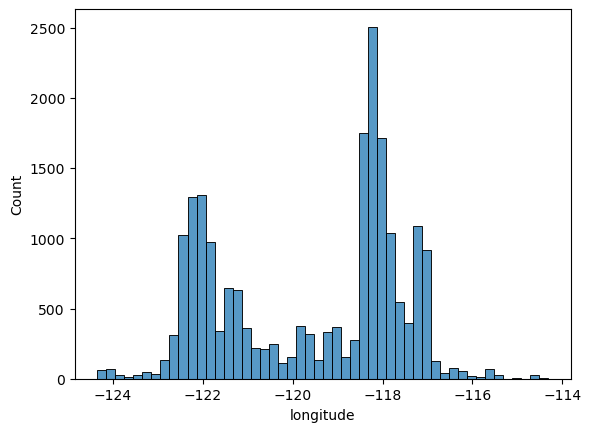

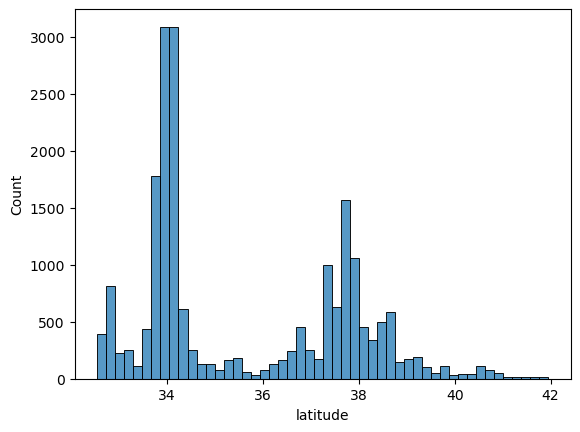

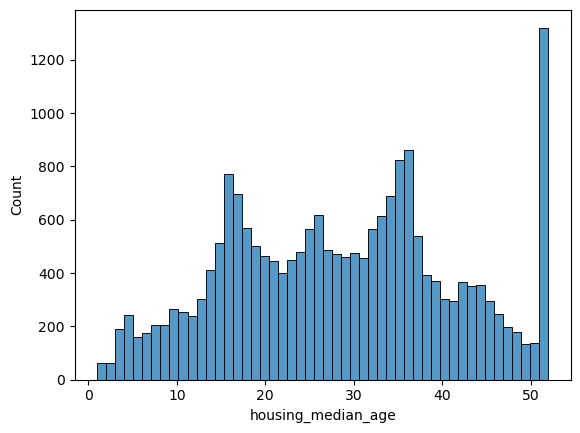

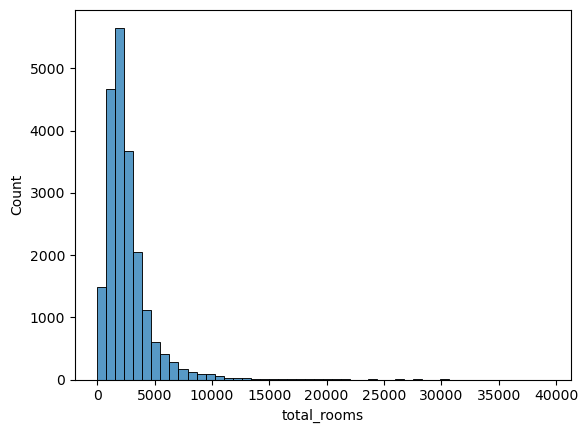

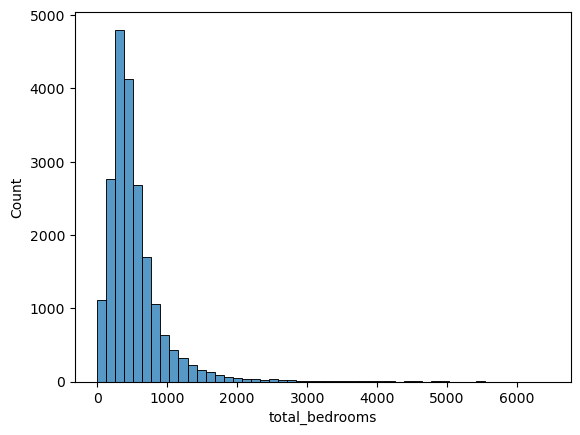

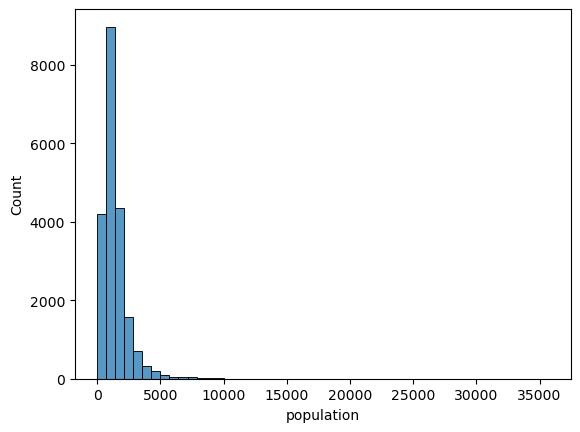

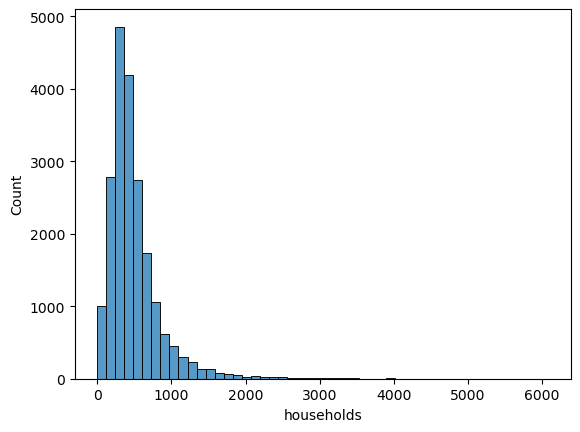

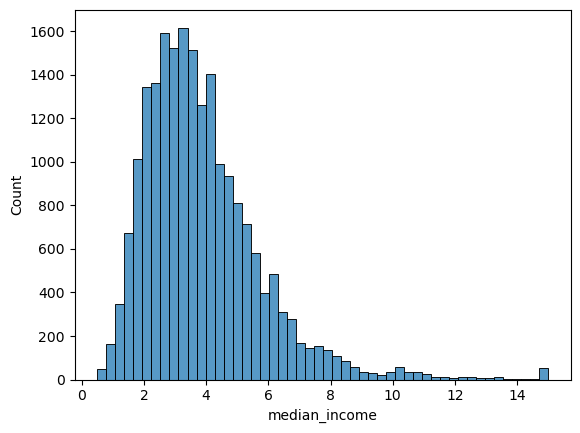

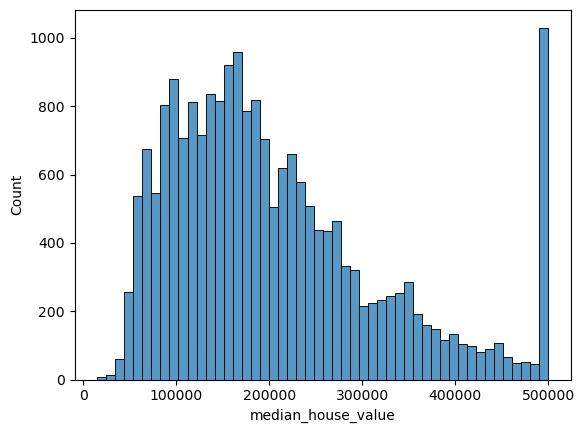

In [155]:
for n in numerical:
    
    sns.histplot(df[n], bins=50)
    plt.show()

Quite some data is not Gaussian distributed. Anyways for the aims of the homework let's apply the log transform only to median_house_value.

In [156]:
df['median_house_value'] = np.log1p(df['median_house_value'])
df['median_house_value']

0        13.022766
1        12.789687
2        12.771673
3        12.740520
4        12.743154
           ...    
20635    11.265758
20636    11.252872
20637    11.432810
20638    11.346883
20639    11.400887
Name: median_house_value, Length: 20640, dtype: float64

Let's re-plot it:

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

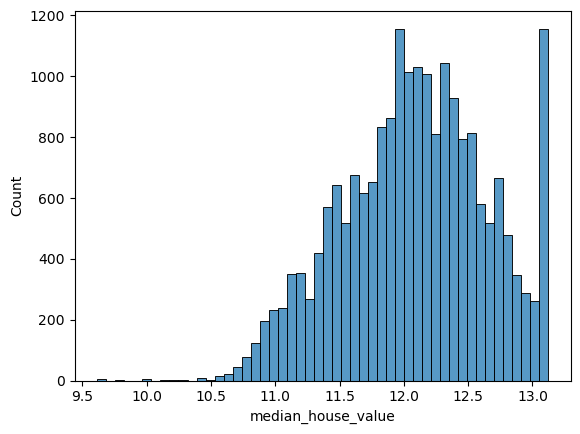

In [157]:
sns.histplot(df['median_house_value'], bins=50)

Let's create our train, validation, and test sets.

In [158]:
print('Length of dataset is: %s' % len(df))
print('Training set length should be: %s' % (round(len(df)*0.6)))
print('Validation and test set lengths should be: %s' % (round(len(df)*0.2)))

Length of dataset is: 20640
Training set length should be: 12384
Validation and test set lengths should be: 4128


In [159]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
print('Length of test set is: %s' % len(df_test))

Length of test set is: 4128


In [160]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
print('Length of training set is: %s' % len(df_train))
print('Length of val set is: %s' % len(df_val))

Length of training set is: 12384
Length of val set is: 4128


In [161]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9107,-118.18,34.63,19.0,3562.0,606.0,1677.0,578.0,4.1573,12.337544,inland
13999,-116.90,34.69,10.0,337.0,102.0,108.0,50.0,0.4999,10.915107,inland
5610,-118.26,33.78,27.0,1672.0,491.0,1723.0,462.0,2.0458,12.069686,near_ocean
13533,-117.33,34.17,5.0,4718.0,1140.0,2564.0,1056.0,2.9877,11.694422,inland
2953,-119.02,35.35,42.0,1239.0,251.0,776.0,272.0,1.9830,11.055656,inland
...,...,...,...,...,...,...,...,...,...,...
4482,-118.19,34.06,32.0,555.0,159.0,748.0,163.0,1.9762,11.831386,<1h_ocean
1835,-122.30,37.90,37.0,2125.0,489.0,912.0,462.0,2.9219,12.288578,near_bay
8539,-118.36,33.90,18.0,3380.0,922.0,2276.0,854.0,4.0727,12.273736,<1h_ocean
2155,-119.79,36.78,41.0,2227.0,462.0,1129.0,415.0,2.3190,10.987003,inland


In [162]:
df_val

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4686,-118.35,34.07,45.0,7803.0,2154.0,3359.0,2041.0,3.3594,12.568982,<1h_ocean
14481,-117.25,32.82,23.0,6139.0,826.0,2036.0,807.0,9.5245,13.122367,near_ocean
1102,-121.54,40.06,17.0,858.0,262.0,47.0,27.0,2.4028,11.119898,inland
10662,-117.81,33.66,20.0,2851.0,490.0,1192.0,463.0,5.8752,12.521617,<1h_ocean
11906,-117.39,33.97,48.0,1915.0,348.0,1060.0,376.0,3.4044,11.677601,inland
...,...,...,...,...,...,...,...,...,...,...
1452,-121.97,37.97,24.0,1330.0,183.0,656.0,205.0,5.0092,12.405337,inland
20283,-119.18,34.18,31.0,2636.0,638.0,2695.0,614.0,3.2196,12.077108,near_ocean
16084,-122.49,37.73,39.0,1937.0,336.0,742.0,307.0,5.1991,12.819638,near_ocean
20483,-118.72,34.28,18.0,2229.0,371.0,1283.0,379.0,5.5955,12.290878,<1h_ocean


In [163]:
df_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,12.779876,<1h_ocean
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,11.166215,inland
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,12.343227,near_bay
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,11.630717,near_bay
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,12.325636,<1h_ocean
...,...,...,...,...,...,...,...,...,...,...
2319,-119.70,36.82,25.0,2379.0,540.0,1482.0,484.0,2.3173,11.130215,inland
5341,-118.44,34.04,49.0,32.0,7.0,14.0,7.0,2.1875,12.323860,<1h_ocean
16888,-122.37,37.60,26.0,15.0,3.0,11.0,3.0,5.0480,12.765691,near_ocean
6823,-118.10,34.09,42.0,1460.0,289.0,829.0,273.0,4.8750,12.334030,<1h_ocean


Let's reset indexes:

In [164]:
df_train = df_train.reset_index(drop=True)
df_val   = df_val.reset_index(drop=True)
df_test  = df_test.reset_index(drop=True)

In [165]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.18,34.63,19.0,3562.0,606.0,1677.0,578.0,4.1573,12.337544,inland
1,-116.90,34.69,10.0,337.0,102.0,108.0,50.0,0.4999,10.915107,inland
2,-118.26,33.78,27.0,1672.0,491.0,1723.0,462.0,2.0458,12.069686,near_ocean
3,-117.33,34.17,5.0,4718.0,1140.0,2564.0,1056.0,2.9877,11.694422,inland
4,-119.02,35.35,42.0,1239.0,251.0,776.0,272.0,1.9830,11.055656,inland
...,...,...,...,...,...,...,...,...,...,...
12379,-118.19,34.06,32.0,555.0,159.0,748.0,163.0,1.9762,11.831386,<1h_ocean
12380,-122.30,37.90,37.0,2125.0,489.0,912.0,462.0,2.9219,12.288578,near_bay
12381,-118.36,33.90,18.0,3380.0,922.0,2276.0,854.0,4.0727,12.273736,<1h_ocean
12382,-119.79,36.78,41.0,2227.0,462.0,1129.0,415.0,2.3190,10.987003,inland


Let's now create the y_* vectors and remove our label from the dfs.

In [166]:
y_train = df_train['median_house_value'].values
y_val = df_val['median_house_value'].values
y_test = df_test['median_house_value'].values

In [167]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

Let's now convert our df_train into a feature matrix using DictVectorizer:

In [168]:
df_train.ocean_proximity.value_counts()

<1h_ocean     5499
inland        3901
near_ocean    1597
near_bay      1383
island           4
Name: ocean_proximity, dtype: int64

In [169]:
df_train.T

,0,1,2,3,4,5,6,7,8,9,...,12374,12375,12376,12377,12378,12379,12380,12381,12382,12383
longitude,-118.18,-116.9,-118.26,-117.33,-119.02,-118.28,-118.01,-118.18,-121.0,-122.5,...,-119.79,-122.06,-116.94,-117.38,-121.84,-118.19,-122.3,-118.36,-119.79,-117.62
latitude,34.63,34.69,33.78,34.17,35.35,34.06,33.79,33.98,37.61,37.77,...,36.75,38.26,32.84,33.14,37.18,34.06,37.9,33.9,36.78,34.02
housing_median_age,19.0,10.0,27.0,5.0,42.0,17.0,23.0,30.0,36.0,52.0,...,33.0,36.0,32.0,14.0,6.0,32.0,37.0,18.0,41.0,9.0
total_rooms,3562.0,337.0,1672.0,4718.0,1239.0,2518.0,2663.0,1735.0,2647.0,2299.0,...,3161.0,1248.0,1607.0,5039.0,9176.0,555.0,2125.0,3380.0,2227.0,4265.0
total_bedrooms,606.0,102.0,491.0,1140.0,251.0,1196.0,430.0,573.0,604.0,441.0,...,934.0,221.0,253.0,1373.0,1201.0,159.0,489.0,922.0,462.0,587.0
population,1677.0,108.0,1723.0,2564.0,776.0,3051.0,1499.0,2237.0,2045.0,1252.0,...,3530.0,672.0,778.0,1298.0,3637.0,748.0,912.0,2276.0,1129.0,2280.0
households,578.0,50.0,462.0,1056.0,272.0,1000.0,403.0,545.0,550.0,415.0,...,846.0,222.0,262.0,696.0,1138.0,163.0,462.0,854.0,415.0,589.0
median_income,4.1573,0.4999,2.0458,2.9877,1.983,1.7199,5.7837,2.3444,2.273,5.0562,...,1.123,3.3839,4.5278,3.209,8.3837,1.9762,2.9219,4.0727,2.319,5.5632
ocean_proximity,inland,inland,near_ocean,inland,inland,<1h_ocean,<1h_ocean,<1h_ocean,inland,near_bay,...,inland,inland,<1h_ocean,near_ocean,<1h_ocean,<1h_ocean,near_bay,<1h_ocean,inland,inland


In [170]:
df_train_dicts = df_train.to_dict(orient='records')
dv             = DictVectorizer(sparse=False)
X_train        = dv.fit_transform(df_train_dicts)
X_train

array([[ 578.  ,   19.  ,   34.63, ..., 1677.  ,  606.  , 3562.  ],
       [  50.  ,   10.  ,   34.69, ...,  108.  ,  102.  ,  337.  ],
       [ 462.  ,   27.  ,   33.78, ..., 1723.  ,  491.  , 1672.  ],
       ...,
       [ 854.  ,   18.  ,   33.9 , ..., 2276.  ,  922.  , 3380.  ],
       [ 415.  ,   41.  ,   36.78, ..., 1129.  ,  462.  , 2227.  ],
       [ 589.  ,    9.  ,   34.02, ..., 2280.  ,  587.  , 4265.  ]])

In [171]:
X_train.shape

(12384, 13)

In [172]:
X_train[0:3, :]

array([[ 5.7800e+02,  1.9000e+01,  3.4630e+01, -1.1818e+02,  4.1573e+00,
         0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         1.6770e+03,  6.0600e+02,  3.5620e+03],
       [ 5.0000e+01,  1.0000e+01,  3.4690e+01, -1.1690e+02,  4.9990e-01,
         0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         1.0800e+02,  1.0200e+02,  3.3700e+02],
       [ 4.6200e+02,  2.7000e+01,  3.3780e+01, -1.1826e+02,  2.0458e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,
         1.7230e+03,  4.9100e+02,  1.6720e+03]])

In [173]:
dv.get_feature_names()

C:\Users\novel\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1h_ocean',
 'ocean_proximity=inland',
 'ocean_proximity=island',
 'ocean_proximity=near_bay',
 'ocean_proximity=near_ocean',
 'population',
 'total_bedrooms',
 'total_rooms']

Let's do the same for df_val:

In [174]:
df_val_dicts = df_val.to_dict(orient='records')
X_val        = dv.transform(df_val_dicts)

Let's now train a Decision Tree regressor to predict the  `median_house_value` variable.

In [175]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [176]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- ocean_proximity=inland <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=inland >  0.50
|   |--- value: [11.61]



C:\Users\novel\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[Text(0.5, 0.75, 'X[6] <= 0.5\nsquared_error = 0.322\nsamples = 12384\nvalue = 12.088'),
 Text(0.25, 0.25, 'squared_error = 0.214\nsamples = 8483\nvalue = 12.307'),
 Text(0.75, 0.25, 'squared_error = 0.227\nsamples = 3901\nvalue = 11.613')]

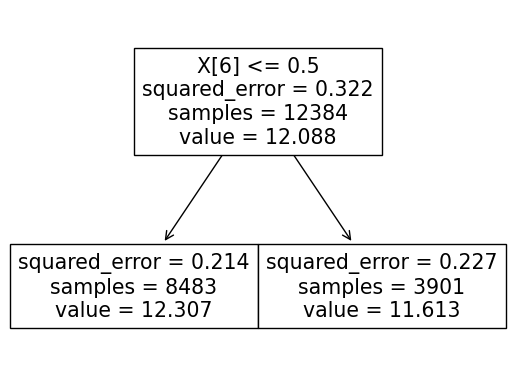

In [177]:
plot_tree(dt)

A decision tree regressor with max_depth=1 uses the feature `oxean_proximity=inland` for splitting the data. 

Let's now train instead a random forest model to predict the variable `median_house_value`, with parameters:
- `n_estimators=10`
- `random_state=1`

In [178]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

Let's now compute the Root Mean Squared Error (RMSE) of this model on validation.

In [179]:
# let's first of all compute predictions on the validation set.
y_pred = rf.predict(X_val)

# now let's compute the RMSE.
rmse = np.sqrt(np.mean((y_pred - y_val)**2))
rmse.round(3)

0.246

Lets now try different number of estimators from 10 to 200 with step 10, and let's evaluate the model on the validation set using the RMSE.

In [180]:
scores = []

for i in range(10, 201, 10):
    
    rf_nest = RandomForestRegressor(n_estimators=i, random_state=1, n_jobs=-1)
    
    rf_nest.fit(X_train, y_train)
    
    y_pred  = rf_nest.predict(X_val)
    
    rmse    = np.sqrt(np.mean((y_pred - y_val)**2))
    
    scores.append((i, rmse))
    
df_scores = pd.DataFrame(scores, columns = ['n_estimators', 'rmse'])
df_scores

,n_estimators,rmse
0,10,0.245738
1,20,0.239262
2,30,0.235717
3,40,0.234583
4,50,0.233104
5,60,0.232843
6,70,0.232384
7,80,0.232527
8,90,0.232215
9,100,0.231968


Let's now plot it:

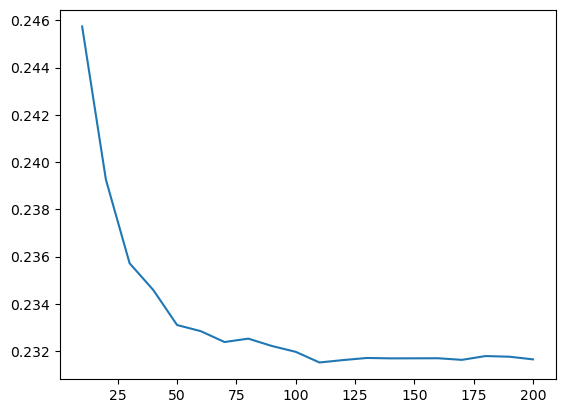

In [181]:
plt.plot(df_scores.n_estimators, df_scores.rmse)
plt.show()

In [182]:
df_scores[df_scores.rmse == min(df_scores.rmse)]

,n_estimators,rmse
10,110,0.231518


Let's now select the `max_depth` value together with the `n_estimators` parameter:

In [183]:
scores = []

for m in [10, 15, 20, 25]:
    
    for i in range(10, 201, 10):
        
        rf_md_nest = RandomForestRegressor(n_estimators=i, max_depth=m, random_state=1, n_jobs=-1)
        
        rf_md_nest.fit(X_train, y_train)
        
        y_pred     = rf_md_nest.predict(X_val)
        
        rmse       = np.sqrt(np.mean((y_pred - y_val)**2))
        
        scores.append((m, i, rmse))
        
df_md_nest = pd.DataFrame(scores, columns = ['max_depth', 'n_estimators', 'rmse'])
df_md_nest

,max_depth,n_estimators,rmse
0,10,10,0.255042
1,10,20,0.252784
2,10,30,0.251647
3,10,40,0.251062
4,10,50,0.250192
...,...,...,...
75,25,160,0.231484
76,25,170,0.231440
77,25,180,0.231598
78,25,190,0.231603


Now, let's plot the RMSE values:

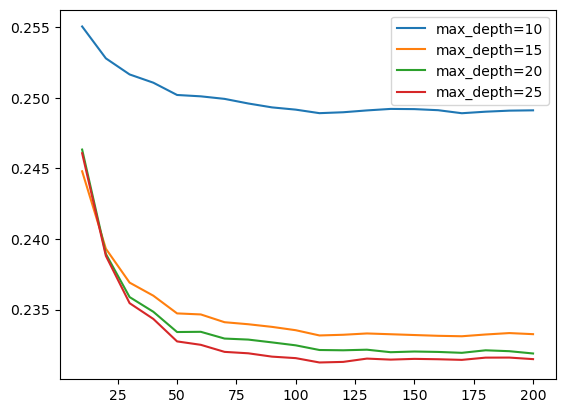

In [185]:
for m in [10, 15, 20, 25]:
    
    df_md_nest_subset = df_md_nest[df_md_nest.max_depth == m]
    
    plt.plot(df_md_nest_subset.n_estimators, df_md_nest_subset.rmse, label = 'max_depth=%s' % m)
    
plt.legend()

Let's now train a RF model with the following parameters:
- `n_estimators = 10`
- `max_depth = 20`
- `random_state = 1`
and then let's analyze feature importance.

In [186]:
rf_fin = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf_fin.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [190]:
rf_fin.feature_importances_

array([1.69573183e-02, 3.30938997e-02, 1.01333971e-01, 9.62649876e-02,
       3.62912907e-01, 3.00723750e-03, 3.10900842e-01, 3.56806263e-04,
       4.48661972e-04, 4.22762446e-03, 3.09180197e-02, 1.90412562e-02,
       2.05364687e-02])

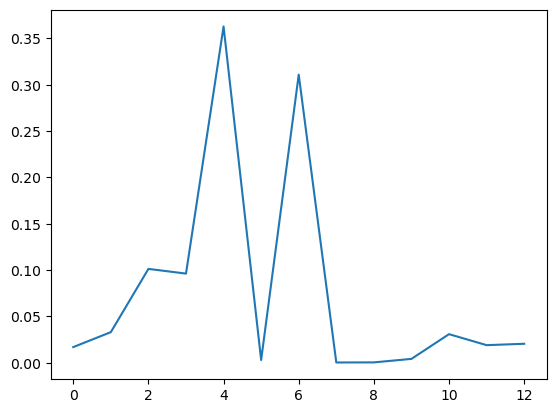

In [191]:
plt.plot(rf_fin.feature_importances_)

In [192]:
dv.get_feature_names()

C:\Users\novel\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1h_ocean',
 'ocean_proximity=inland',
 'ocean_proximity=island',
 'ocean_proximity=near_bay',
 'ocean_proximity=near_ocean',
 'population',
 'total_bedrooms',
 'total_rooms']

It appears that the most important feature is `longitude`.

Let's now train an XGBoost model, and tune the `eta` parameter.

For that we first need to create DMatrices for training and validation.

In [203]:
features = dv.get_feature_names()
features[5] = 'ocean_proximity=lt_1h_ocean'
features

C:\Users\novel\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=lt_1h_ocean',
 'ocean_proximity=inland',
 'ocean_proximity=island',
 'ocean_proximity=near_bay',
 'ocean_proximity=near_ocean',
 'population',
 'total_bedrooms',
 'total_rooms']

In [204]:
# let's create the DMatrix for training:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)

# let's create the DMatrix for validation:
dval   = xgb.DMatrix(X_val, label=y_val, feature_names=features)

Let's now create a watchlist: keep in mind that in xgb it is possible to monitor the performance of the training procedure by immediately evaluate on both the training and the validation sets the performance of our model after each iteration (_i.e._ after each new tree). The data to be used is specified in the below watchlist: 

In [206]:
watchlist = [(dtrain, 'training'), (dval, 'validation')]

Let's now specify the model's parameter, and then train our model by passing our watchlist to it.

In [207]:
xgb_params = {
    
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round=100)

[0]	training-rmse:8.12733	validation-rmse:8.13245
[1]	training-rmse:5.69586	validation-rmse:5.70070
[2]	training-rmse:3.99540	validation-rmse:4.00041
[3]	training-rmse:2.80712	validation-rmse:2.81079
[4]	training-rmse:1.97834	validation-rmse:1.98175
[5]	training-rmse:1.40218	validation-rmse:1.40741
[6]	training-rmse:1.00099	validation-rmse:1.00700
[7]	training-rmse:0.72751	validation-rmse:0.73439
[8]	training-rmse:0.54190	validation-rmse:0.55047
[9]	training-rmse:0.42167	validation-rmse:0.43233
[10]	training-rmse:0.34481	validation-rmse:0.35782
[11]	training-rmse:0.29835	validation-rmse:0.31360
[12]	training-rmse:0.27095	validation-rmse:0.28865
[13]	training-rmse:0.25268	validation-rmse:0.27334
[14]	training-rmse:0.24295	validation-rmse:0.26605
[15]	training-rmse:0.23555	validation-rmse:0.26044
[16]	training-rmse:0.22630	validation-rmse:0.25229
[17]	training-rmse:0.22233	validation-rmse:0.24902
[18]	training-rmse:0.22029	validation-rmse:0.24826
[19]	training-rmse:0.21791	validation-rms

Let's now compute the RMSE on the validation set:

In [208]:
# let's first compute predictions:
y_pred = model.predict(dval)

# now let's compute RMSE:
rmse = np.sqrt(np.mean((y_pred - y_val)**2))
rmse

0.2260957847928297

Let's now do the same by changing our `eta` parameter to 0.1:

In [209]:
xgb_params = {
    
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round=100)

[0]	training-rmse:10.44372	validation-rmse:10.44938
[1]	training-rmse:9.40118	validation-rmse:9.40684
[2]	training-rmse:8.46290	validation-rmse:8.46831
[3]	training-rmse:7.61859	validation-rmse:7.62391
[4]	training-rmse:6.85878	validation-rmse:6.86368
[5]	training-rmse:6.17513	validation-rmse:6.17987
[6]	training-rmse:5.55994	validation-rmse:5.56437
[7]	training-rmse:5.00643	validation-rmse:5.01061
[8]	training-rmse:4.50846	validation-rmse:4.51264
[9]	training-rmse:4.06043	validation-rmse:4.06461
[10]	training-rmse:3.65741	validation-rmse:3.66135
[11]	training-rmse:3.29492	validation-rmse:3.29877
[12]	training-rmse:2.96894	validation-rmse:2.97284
[13]	training-rmse:2.67573	validation-rmse:2.67979
[14]	training-rmse:2.41195	validation-rmse:2.41587
[15]	training-rmse:2.17500	validation-rmse:2.17928
[16]	training-rmse:1.96214	validation-rmse:1.96662
[17]	training-rmse:1.77065	validation-rmse:1.77536
[18]	training-rmse:1.59880	validation-rmse:1.60396
[19]	training-rmse:1.44376	validation-r

In [210]:
# let's first compute predictions:
y_pred = model.predict(dval)

# now let's compute RMSE:
rmse = np.sqrt(np.mean((y_pred - y_val)**2))
rmse

0.2305416021993131

The RMSE is lower for `eta = 0.3`.